In [48]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [2]:
df = pd.read_csv('classification.csv')
df.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [9]:
#TruePositive
TP_frame = df[(df['true'] == 1) & (df['pred'] == 1)]
TP =len(TP_frame)
TP

43

In [10]:
#TrueNegative
TN_frame = df[(df['true'] == 0) & (df['pred'] == 0)]
TN =len(TN_frame)
TN

64

In [11]:
#FalsePositive
FP_frame = df[(df['true'] == 0) & (df['pred'] == 1)]
FP =len(FP_frame)
FP

34

In [12]:
#FalseNegative
FN_frame = df[(df['true'] == 1) & (df['pred'] == 0)]
FN =len(FN_frame)
FN

59

In [13]:
print(TP,FP,FN,TN)

43 34 59 64


In [17]:
#Accuracy
Hand_Acc = (TP+TN)/(TP+FP+TN+FN)
Sk_Acc = accuracy_score(df['true'], df['pred'])

print(Hand_Acc, Sk_Acc)

0.535 0.535


In [18]:
#Precision
Hand_Prec = TP/(TP+FP)
Sk_Prec = precision_score(df['true'], df['pred'])

print(Hand_Prec, Sk_Prec)

0.5584415584415584 0.5584415584415584


In [19]:
#Recall
Hand_Recall = TP/(TP+FN)
Sk_Recall = recall_score(df['true'], df['pred'])

print(Hand_Recall, Sk_Recall)

0.4215686274509804 0.4215686274509804


In [20]:
#F-metrics
Hand_F = 2*Hand_Precision*Hand_Recall/(Hand_Precision+ Hand_Recall)
Sk_F = f1_score(df['true'], df['pred'])

print(Hand_F, Sk_F)

0.4715588808035257 0.48044692737430167


In [21]:
print(Sk_Acc, Sk_Prec, Sk_Recall, Sk_F)

0.535 0.5584415584415584 0.4215686274509804 0.48044692737430167


In [23]:
print(round(Sk_Acc,2), round(Sk_Prec,2), round(Sk_Recall,2), round(Sk_F,2))

0.54 0.56 0.42 0.48


In [27]:
data = pd.read_csv('scores.csv')
data.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


0.719187675070028
0.6351540616246498
0.7086834733893557
0.6919267707082833


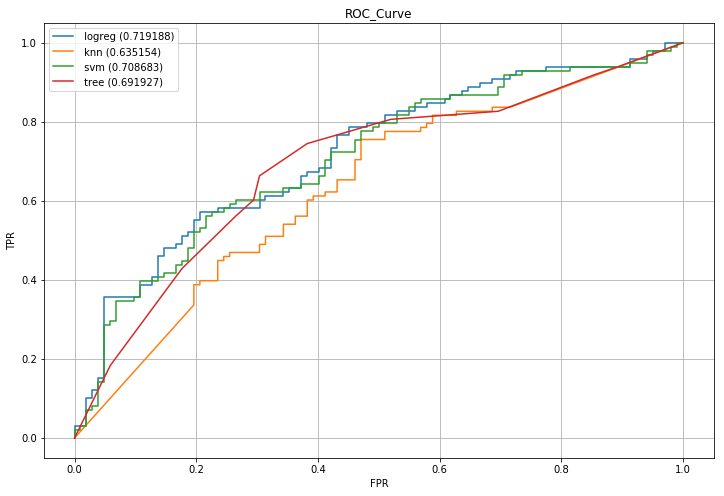

In [46]:
print(roc_auc_score(data['true'], data['score_logreg']))
fpr1, tpr1, thresholds1 = roc_curve(data['true'], data['score_logreg'])
plt.plot(fpr1,tpr1,  label =' logreg (%f)'%roc_auc_score(data['true'], data['score_logreg']))

print(roc_auc_score(data['true'], data['score_knn']))
fpr2, tpr2, thresholds2 = roc_curve(data['true'], data['score_knn'])
plt.plot(fpr2,tpr2,  label =' knn (%f)'%roc_auc_score(data['true'], data['score_knn']))

print(roc_auc_score(data['true'], data['score_svm']))
fpr3, tpr3, thresholds3 = roc_curve(data['true'], data['score_svm'])
plt.plot(fpr3,tpr3,  label =' svm (%f)'%roc_auc_score(data['true'], data['score_svm']))

print(roc_auc_score(data['true'], data['score_tree']))
fpr4, tpr4, thresholds4 = roc_curve(data['true'], data['score_tree'])
plt.plot(fpr4,tpr4,  label =' tree (%f)'%roc_auc_score(data['true'], data['score_tree']))



plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.title('ROC_Curve')
plt.show()

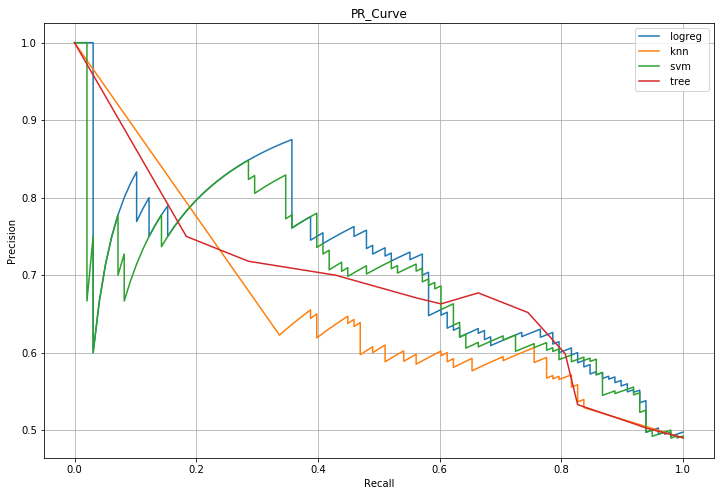

In [51]:
#print(roc_auc_score(data['true'], data['score_logreg']))
pre1, rec1, thresholds1 = precision_recall_curve(data['true'], data['score_logreg'])
plt.plot(rec1, pre1,  label =' logreg ')

#print(roc_auc_score(data['true'], data['score_knn']))
pre2, rec2, thresholds2 = precision_recall_curve(data['true'], data['score_knn'])
plt.plot(rec2,pre2,  label =' knn')

#print(roc_auc_score(data['true'], data['score_svm']))
pre3, rec3, thresholds3 = precision_recall_curve(data['true'], data['score_svm'])
plt.plot(rec3,pre3,  label =' svm ')

#print(roc_auc_score(data['true'], data['score_tree']))
pre4, rec4, thresholds4 = precision_recall_curve(data['true'], data['score_tree'])
plt.plot(rec4,pre4,  label =' tree ')



plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.title('PR_Curve')
plt.show()

In [56]:
data_pre_rec = {'logreg_prec':pre1, 'logreg_rec':rec1}

df_PR = pd.DataFrame(data = data_pre_rec)

In [61]:
#LogisticRegression

df_PR[df_PR['logreg_rec'] >= 0.7]['logreg_prec'].max()

0.6302521008403361

In [62]:
#kNN
data_pre_rec_knn = {'knn_prec':pre2, 'knn_rec':rec2}

df_PR = pd.DataFrame(data = data_pre_rec_knn)

df_PR[df_PR['knn_rec'] >= 0.7]['knn_prec'].max()


0.6065573770491803

In [64]:
#SVM
data_pre_rec_svm = {'svm_prec':pre3, 'svm_rec':rec3}

df_PR = pd.DataFrame(data = data_pre_rec_svm)

df_PR[df_PR['svm_rec'] >= 0.7]['svm_prec'].max()

0.6228070175438597

In [66]:
#tree
data_pre_rec_tree = {'tree_prec':pre4, 'tree_rec':rec4}

df_PR = pd.DataFrame(data = data_pre_rec_tree)

round(df_PR[df_PR['tree_rec'] >= 0.7]['tree_prec'].max(),2)

0.65